In [113]:
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler

def load_data(filename):
    df = pd.read_csv(filename)
    coords = df[['mw', 'complexity', 'polararea', 'xlogp', 'rotbonds', 'heavycnt']].values
    return df, coords

def rcb_partition(points, num_levels=None, points_per_subdomain=None):
    if num_levels is None and points_per_subdomain is None:
        num_levels = 3  # default
    elif num_levels is not None and points_per_subdomain is not None:
        raise ValueError("Provide either num_levels or points_per_subdomain, not both")
    elif points_per_subdomain is not None:
        N = points.shape[0]
        num_subdomains = int(N / points_per_subdomain)
        num_levels = int(math.log2(num_subdomains))

    D = points.shape[1]
    N = points.shape[0]
    indices = np.arange(N)
    assignments = np.zeros(N, dtype=int)

    def recurse(ind, start_id, level, dim):
        if level == 0 or len(ind) <= 1:
            assignments[ind] = start_id
            return
        sorted_ind = ind[np.argsort(points[ind, dim])]
        mid = len(sorted_ind) // 2
        left = sorted_ind[:mid]
        right = sorted_ind[mid:]
        next_dim = (dim + 1) % D
        recurse(left, start_id, level - 1, next_dim)
        recurse(right, start_id + (1 << (level - 1)), level - 1, next_dim)

    recurse(indices, 0, num_levels, 0)
    return assignments

# Usage:
df, points = load_data('../polygraphpy/data/original_dataset.csv')
# scaler = MinMaxScaler()
# coords_scaled = scaler.fit_transform(points)
assignments = rcb_partition(points, num_levels=4)
df['cluster'] = assignments

In [114]:
df.groupby('cluster').count()['id']

cluster
0     601
1     602
2     601
3     602
4     601
5     602
6     602
7     602
8     601
9     602
10    601
11    602
12    601
13    602
14    602
15    602
Name: id, dtype: int64

In [115]:
import plotly.express as px

fig = px.scatter_3d(df, x='mw', y='complexity', z='polararea', color='cluster', color_continuous_scale='jet')
fig.update_traces(marker={'size': 3})
fig.update_layout(width=1000, height=500)
fig.show()

In [116]:
import plotly.express as px

fig = px.scatter_3d(df, x='xlogp', y='rotbonds', z='heavycnt', color='cluster', color_continuous_scale='jet')
fig.update_traces(marker={'size': 3})
fig.update_layout(width=1000, height=500)
fig.show()

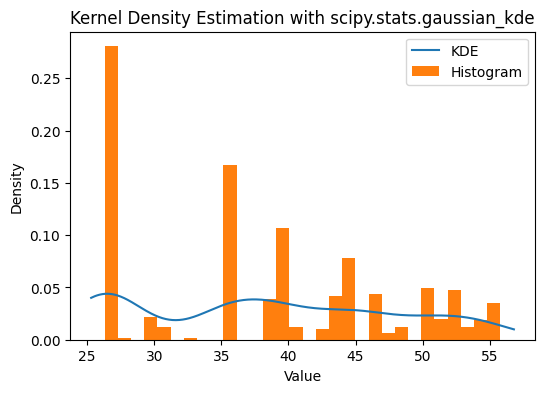

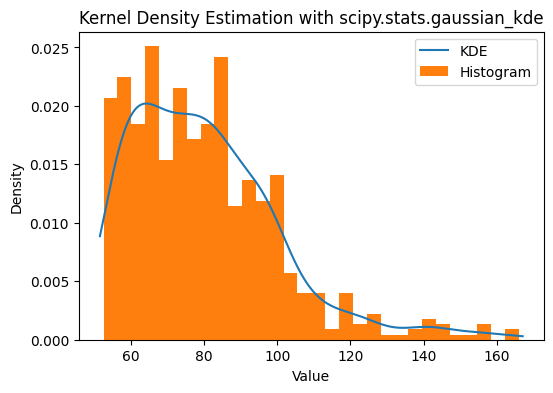

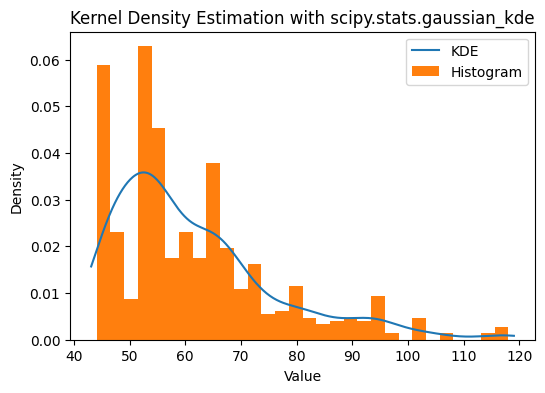

In [119]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def create_kde(x):
    # Create the KDE object
    kde = gaussian_kde(x)

    # Evaluate the KDE at specific points
    x_eval = np.linspace(x.min() - 1, x.max() + 1, 500)
    density_values = kde(x_eval)

    # Plotting the results
    plt.figure(figsize=(6,4))
    plt.plot(x_eval, density_values, label='KDE')
    plt.hist(x, bins=30, density=True, label='Histogram')
    plt.title('Kernel Density Estimation with scipy.stats.gaussian_kde')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()


x = df[df['cluster'] == 5]['polararea'].values
create_kde(x)

x = df[df['cluster'] == 10]['polararea'].values
create_kde(x)

x = df[df['cluster'] == 2]['polararea'].values
create_kde(x)